# Неперіодичні сигнали


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

## Чірп

Створимо лінійний чірп від A3 до A5

In [2]:
from thinkdsp import Chirp

signal = Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Ось як виглядає хвиля на початку.

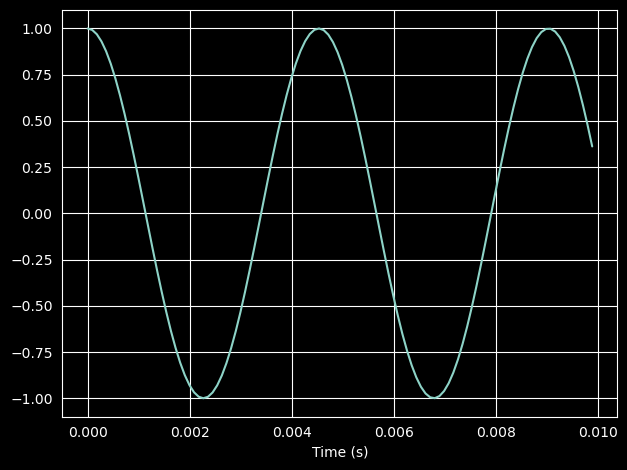

In [3]:
wave1.segment(start=0, duration=0.01).plot()
decorate(xlabel='Time (s)')

А ось кінець

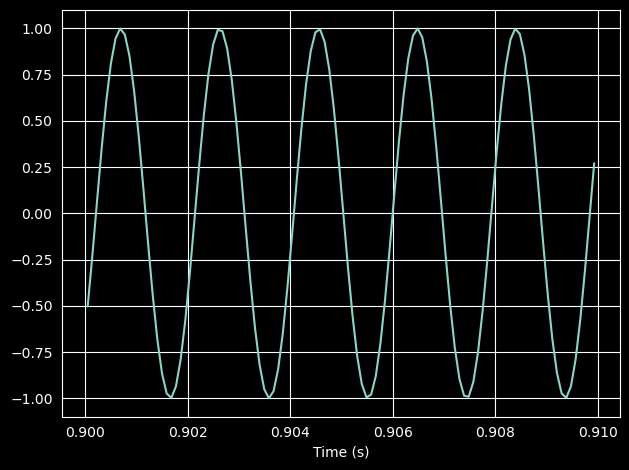

In [4]:
wave1.segment(start=0.9, duration=0.01).plot()
decorate(xlabel='Time (s)')

А ось експоненціальний чірп в тому ж діапазоні частот такої самої тривалості

In [5]:
from thinkdsp import ExpoChirp

signal = ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.make_audio()

## Витік

Спектральний витік — це коли частина енергії на одній частоті з’являється на іншій частоті (зазвичай поблизу).

Давайте подивимося на вплив витоку на синусоїдний сигнал (який містить лише одну частотну складову).


In [6]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

Якщо тривалість є цілим числом, кратним періоду, початок і кінець сегмента збігаються, і ми отримуємо мінімальний витік.

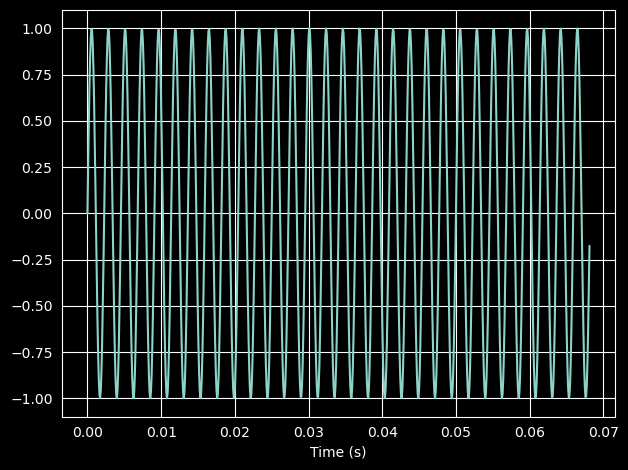

In [7]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

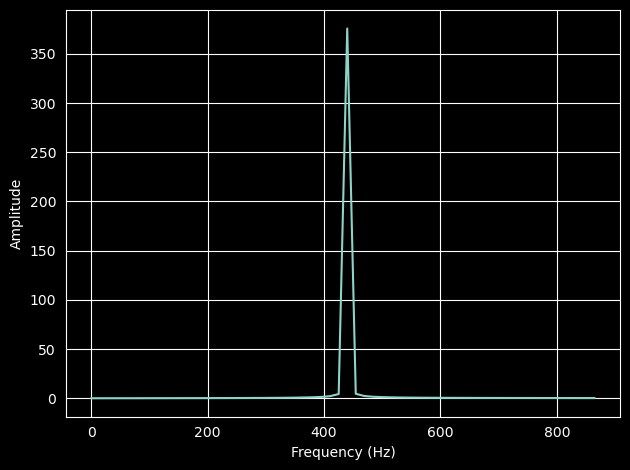

In [8]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Якщо тривалість не кратна періоду, витік досить поганий.

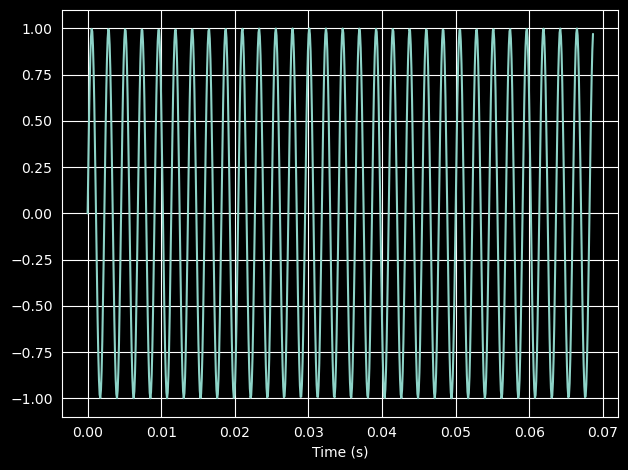

In [9]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

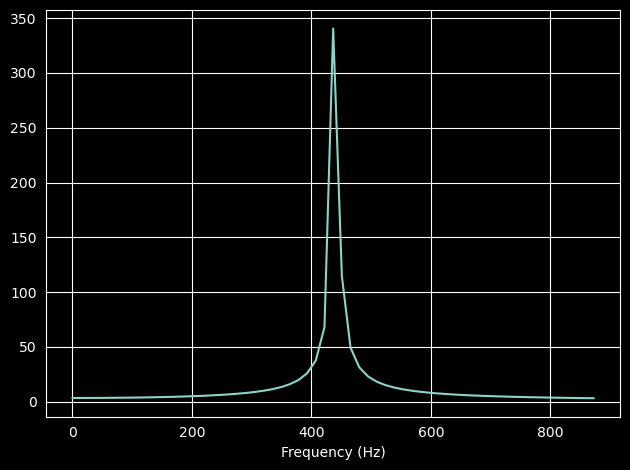

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Хамінг допомагає (але зауважте, що воно зменшує загальну енергію).

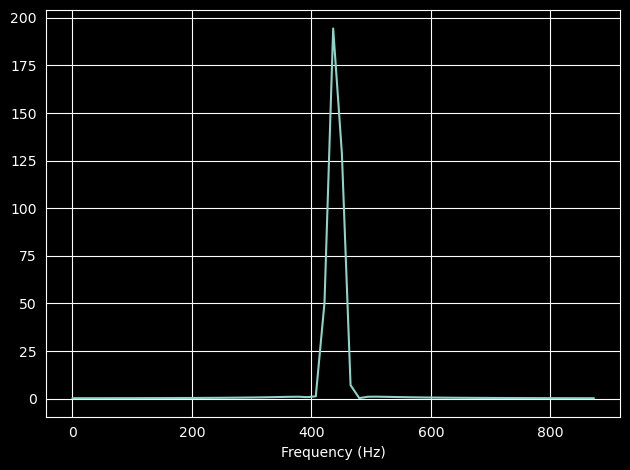

In [11]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

## Спектрограма

Якщо ви сліпо обчислюєте DFT неперіодичного сегмента, ви отримуєте "розмиття руху".

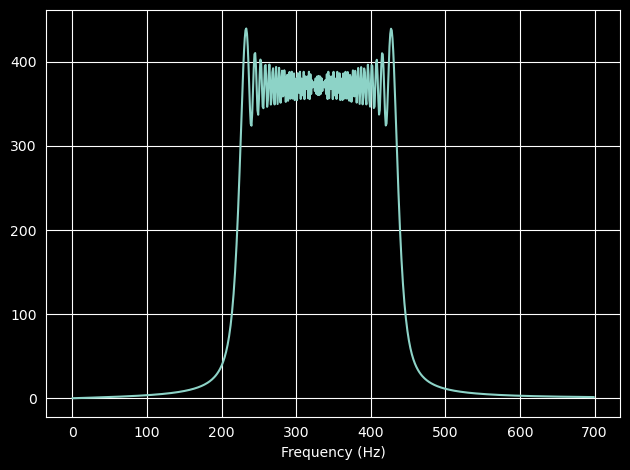

In [12]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
decorate(xlabel='Frequency (Hz)')

Спектрограма — це візуалізація короткочасного DFT, яка дає змогу побачити, як спектр змінюється з часом.

In [13]:
def plot_spectrogram(wave, seg_length):
    """
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


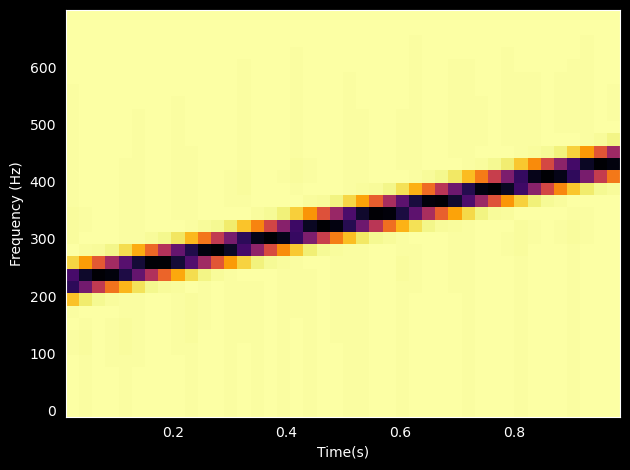

In [14]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

Якщо збільшити довжину сегмента, ви отримаєте кращу роздільну здатність по частоті та гіршу роздільну здатність за часом.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


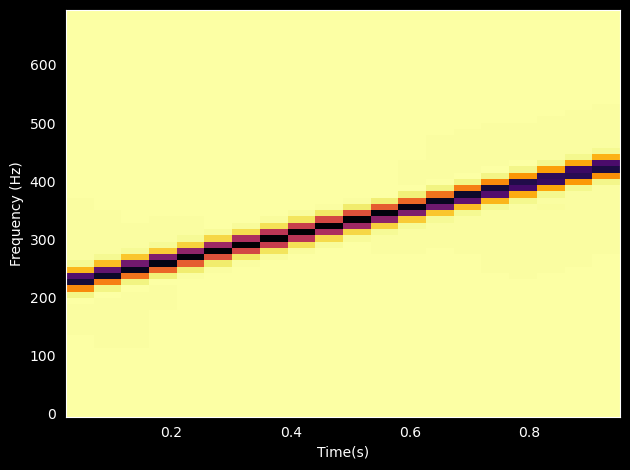

In [15]:
plot_spectrogram(wave, 1024)

Якщо ви зменшите довжину сегмента, ви отримаєте кращу роздільну здатність за часом і гіршу роздільну здатність за частотою.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


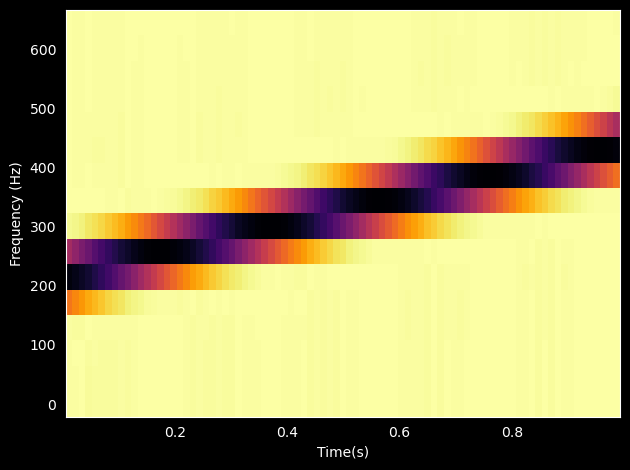

In [16]:
plot_spectrogram(wave, 256)

In [17]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

interactive(children=(IntSlider(value=128, description='seg_length', max=4096, min=128, step=128), Output()), …

## Спектр чірпа

Наступна взаємодія дозволяє налаштувати Око Саурона, коли ви змінюєте початкову та кінцеву частоту чірпа.

In [18]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal =  Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [19]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

interactive(children=(FloatSlider(value=100.0, description='start', max=1000.0, min=100.0, step=50.0), FloatSl…